# Case Study Customer Analysis

## Load data

In [1]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import *

In [2]:
# We import our data from Excel file
ca_df=pd.read_csv("Data/customer_analayiss_case_study_with_response.csv")
ca_df

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [3]:
# Columns name looks ok, no need to standarzing the columns name with function lower case
# wtih function rename I will change the columns name. 
#from "customer lifetime value to customer_lifetime_value"
def rename_columns(ca_df):
    ca_df.rename(columns={'customer lifetime value':'customer_lifetime_value','monthly premium auto':'monthly_premium_auto', 'number of open complaints':'number_of_open_complaints',"policy type":"policy_type", "vehicle class":"vehicle_class","total claim amount": "total_claim_amount","sales channel":"sales_channel", "response":"response"}, inplace=True )
    return ca_df


In [4]:
rename_columns(ca_df)

,Unnamed: 0,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [5]:
# I can see that I have a column name "unnamed=0" that duplicates the column that indicates the number of the row
list(ca_df.columns) 


['Unnamed: 0',
 'state',
 'customer_lifetime_value',
 'education',
 'gender',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'policy_type',
 'total_claim_amount',
 'vehicle_class',
 'sales_channel',
 'response']

In [6]:
ca_df = ca_df[[
 'state',
 'customer_lifetime_value',
 'education',
 'gender',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'policy_type',
 'total_claim_amount',
 'vehicle_class',
 'sales_channel',
 'response']]

ca_df

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


## Working with Data type

In [7]:
# checking data type of our data set
ca_df.info()
# We this function we can see the data type.
# after checkin the data. The column "number of open complaint" should not be a float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      10279 non-null  object 
 1   customer_lifetime_value    10910 non-null  float64
 2   education                  10910 non-null  object 
 3   gender                     10910 non-null  object 
 4   income                     10910 non-null  int64  
 5   monthly_premium_auto       10910 non-null  int64  
 6   number_of_open_complaints  10277 non-null  float64
 7   policy_type                10910 non-null  object 
 8   total_claim_amount         10910 non-null  float64
 9   vehicle_class              10288 non-null  object 
 10  sales_channel              10910 non-null  object 
 11  response                   10279 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1022.9+ KB


In [8]:
# variable "number_of_open_complaints" should not be a float number. 
# We can see that there is many NaN values in the columns.
#We cannot transform "number_of_open_complaints" into an integer because of Nan values 
#In this case, we have to replace the NaN values with "0" with replace function.


ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].fillna(0)






C:\Users\merce\AppData\Local\Temp/ipykernel_13216/3034024917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].fillna(0)


In [9]:
# we can transform "number_of_open_complaints" into an integer

ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].astype('int')

C:\Users\merce\AppData\Local\Temp/ipykernel_13216/4036491843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['number_of_open_complaints'] = ca_df['number_of_open_complaints'].astype('int')


In [10]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      10279 non-null  object 
 1   customer_lifetime_value    10910 non-null  float64
 2   education                  10910 non-null  object 
 3   gender                     10910 non-null  object 
 4   income                     10910 non-null  int64  
 5   monthly_premium_auto       10910 non-null  int64  
 6   number_of_open_complaints  10910 non-null  int32  
 7   policy_type                10910 non-null  object 
 8   total_claim_amount         10910 non-null  float64
 9   vehicle_class              10288 non-null  object 
 10  sales_channel              10910 non-null  object 
 11  response                   10279 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 980.3+ KB


## Filtering data and Correcting typos

In [11]:
# We need to standardize the text in the column "gender".

ca_df['gender'].value_counts()

F    5573
M    5337
Name: gender, dtype: int64

In [12]:
# number of missing values in the column "gender"

len(ca_df[ca_df['gender'].isna()==True])

0

In [13]:
# with the new data set, the column text is already standardized

ca_df.gender.unique()

array(['M', 'F'], dtype=object)

In [14]:
#Let's have a look to the column "state"

ca_df['state'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [15]:
len(ca_df[ca_df['state'].isna()==True])

631

In [16]:
def clean_state(x):
    if x in ['California', 'Cali']:
        return 'california'
    elif x in["Arizona","az"]:
        return 'arizona'
    elif x in ["Washington","wa"]:
         return "washington"
    elif x in ["Oregon"]:
         return "oregon"
    elif x in ["Nevada"]:
        return "nevada"
    else:
        return 'U'

In [17]:
ca_df['state'] = list(map(clean_state, ca_df['state'])) 

C:\Users\merce\AppData\Local\Temp/ipykernel_13216/7630794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['state'] = list(map(clean_state, ca_df['state']))


In [18]:
ca_df.state.unique()

array(['arizona', 'california', 'washington', 'oregon', 'U', 'nevada'],
      dtype=object)

## Removing duplicates

In [19]:
# we have to use the function drop_duplicates()

ca_df.drop_duplicates()

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
0,arizona,4809.216960,College,M,48029,61,0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,california,2228.525238,College,F,0,64,0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,washington,14947.917300,Bachelor,M,22139,100,0,Personal Auto,480.000000,SUV,Call Center,No
3,oregon,22332.439460,College,M,49078,97,0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,oregon,9025.067525,Bachelor,F,23675,117,0,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,Bachelor,F,0,253,0,Personal Auto,1214.400000,Luxury Car,Web,No
10906,oregon,5259.444853,College,F,61146,65,0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,arizona,23893.304100,Bachelor,F,39837,201,0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,california,11971.977650,College,F,64195,158,4,Personal Auto,618.288849,SUV,Branch,No


## Replace null values

In [20]:
# in numerical columns, we will replace the NaN values with the mean of each column
# have a loock to our numerical columns

x_df=ca_df._get_numeric_data()
x_df

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,4809.216960,48029,61,0,292.800000
1,2228.525238,0,64,0,744.924331
2,14947.917300,22139,100,0,480.000000
3,22332.439460,49078,97,0,484.013411
4,9025.067525,23675,117,0,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,0,1214.400000
10906,5259.444853,61146,65,0,273.018929
10907,23893.304100,39837,201,0,381.306996
10908,11971.977650,64195,158,4,618.288849


In [21]:
nulls_df = pd.DataFrame(round(x_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer_lifetime_value,0.0
1,income,0.0
2,monthly_premium_auto,0.0
3,number_of_open_complaints,0.0
4,total_claim_amount,0.0


In [22]:
#There are not NaN values in the numerical columns.
# what about the categorical columns?

y_df=ca_df.select_dtypes('object')
y_df

#but we still have some missing values in the following columns: "vehicle_class" and "response"

,state,education,gender,policy_type,vehicle_class,sales_channel,response
0,arizona,College,M,Corporate Auto,Four-Door Car,Agent,No
1,california,College,F,Personal Auto,Four-Door Car,Call Center,No
2,washington,Bachelor,M,Personal Auto,SUV,Call Center,No
3,oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes
4,oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...
10905,nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No
10906,oregon,College,F,Personal Auto,Four-Door Car,Branch,No
10907,arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No
10908,california,College,F,Personal Auto,SUV,Branch,No


In [23]:
nulls_df = pd.DataFrame(round(y_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.00
1,education,0.00
2,gender,0.00
3,policy_type,0.00
4,vehicle_class,5.70
5,sales_channel,0.00
6,response,5.78


In [24]:
# we wll use the function fillna to replace all NaN values with "0" in the column "vehicle_class"
# we will replace the NaN values with the categorial variable "No"


ca_df['vehicle_class'] = ca_df['vehicle_class'].fillna(0)

ca_df["response"]=ca_df["response"].fillna("No")





C:\Users\merce\AppData\Local\Temp/ipykernel_13216/3441171592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['vehicle_class'] = ca_df['vehicle_class'].fillna(0)
C:\Users\merce\AppData\Local\Temp/ipykernel_13216/3441171592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df["response"]=ca_df["response"].fillna("No")


In [25]:
ca_df.response.value_counts()

No     9444
Yes    1466
Name: response, dtype: int64

In [26]:
# with this function. We can see that we do not have more missing values
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.0
1,customer_lifetime_value,0.0
2,education,0.0
3,gender,0.0
4,income,0.0
5,monthly_premium_auto,0.0
6,number_of_open_complaints,0.0
7,policy_type,0.0
8,total_claim_amount,0.0
9,vehicle_class,0.0


## Creating groups of data

In [27]:
# we will create a new column called "region". This new column will represent data from column "state" as follows:

# california = West
# Oregon = North
# washington = East
# Arizona & Nevada = Central

# First, I will create a dictionary with the new labels


In [28]:
state_labels ={
    "california":"west",
    "oregon":"north",
    "washington":"east",
    "arizona":"central",
    "nevada":"central"
}


In [29]:
# We can use assign function to append a new column called "region"

ca_df=ca_df.assign(region=ca_df.state.map(state_labels))
ca_df

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response,region
0,arizona,4809.216960,College,M,48029,61,0,Corporate Auto,292.800000,Four-Door Car,Agent,No,central
1,california,2228.525238,College,F,0,64,0,Personal Auto,744.924331,Four-Door Car,Call Center,No,west
2,washington,14947.917300,Bachelor,M,22139,100,0,Personal Auto,480.000000,SUV,Call Center,No,east
3,oregon,22332.439460,College,M,49078,97,0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,north
4,oregon,9025.067525,Bachelor,F,23675,117,0,Personal Auto,707.925645,Four-Door Car,Branch,No,north
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,Bachelor,F,0,253,0,Personal Auto,1214.400000,Luxury Car,Web,No,central
10906,oregon,5259.444853,College,F,61146,65,0,Personal Auto,273.018929,Four-Door Car,Branch,No,north
10907,arizona,23893.304100,Bachelor,F,39837,201,0,Corporate Auto,381.306996,Luxury SUV,Web,No,central
10908,california,11971.977650,College,F,64195,158,4,Personal Auto,618.288849,SUV,Branch,No,west


**Which columns are numerical and which columns are categorical?**

In [30]:
# numerical columns:
ca_df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,4809.216960,48029,61,0,292.800000
1,2228.525238,0,64,0,744.924331
2,14947.917300,22139,100,0,480.000000
3,22332.439460,49078,97,0,484.013411
4,9025.067525,23675,117,0,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,0,1214.400000
10906,5259.444853,61146,65,0,273.018929
10907,23893.304100,39837,201,0,381.306996
10908,11971.977650,64195,158,4,618.288849


In [31]:
# categorical columns
ca_df.select_dtypes('object')

,state,education,gender,policy_type,vehicle_class,sales_channel,response,region
0,arizona,College,M,Corporate Auto,Four-Door Car,Agent,No,central
1,california,College,F,Personal Auto,Four-Door Car,Call Center,No,west
2,washington,Bachelor,M,Personal Auto,SUV,Call Center,No,east
3,oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes,north
4,oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No,north
...,...,...,...,...,...,...,...,...
10905,nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No,central
10906,oregon,College,F,Personal Auto,Four-Door Car,Branch,No,north
10907,arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No,central
10908,california,College,F,Personal Auto,SUV,Branch,No,west


In [32]:
#check again if we have some missing values
# We can see missing values in the new column "region"
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df


,header_name,percent_nulls
0,state,0.00
1,customer_lifetime_value,0.00
2,education,0.00
3,gender,0.00
4,income,0.00
5,monthly_premium_auto,0.00
6,number_of_open_complaints,0.00
7,policy_type,0.00
8,total_claim_amount,0.00
9,vehicle_class,0.00


In [33]:
#I replace the NaN values with "0"
ca_df['region'] = ca_df['region'].fillna(0)

In [34]:
nulls_df = pd.DataFrame(round(ca_df.isna().sum()/len(ca_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,state,0.0
1,customer_lifetime_value,0.0
2,education,0.0
3,gender,0.0
4,income,0.0
5,monthly_premium_auto,0.0
6,number_of_open_complaints,0.0
7,policy_type,0.0
8,total_claim_amount,0.0
9,vehicle_class,0.0


## Plots

In [35]:
# we need the plot for the following:
# total number of responses: 

ca_df.response.value_counts()



No     9444
Yes    1466
Name: response, dtype: int64

In [36]:
total_response =ca_df.response.value_counts()

Text(0.5, 1.0, 'total number of responses')

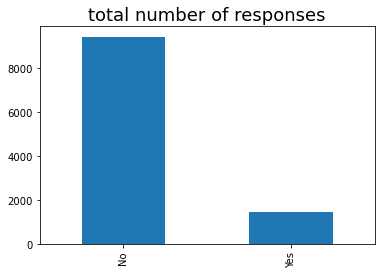

In [37]:
ca_df['response'].value_counts().plot(kind="bar")
plt.title("total number of responses",{"fontsize":18})

In [38]:
# response rate by the sales channel.
ca_df.sales_channel.value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales_channel, dtype: int64

Response_rate= received answers number/ total answers
Response_rate=1466/10910


In [39]:

response_labels ={
    "Yes":"1",
    "No":"0"
}


In [40]:
ca_df=ca_df.assign(yes_response=ca_df.response.map(response_labels))
ca_df

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response,region,yes_response
0,arizona,4809.216960,College,M,48029,61,0,Corporate Auto,292.800000,Four-Door Car,Agent,No,central,0
1,california,2228.525238,College,F,0,64,0,Personal Auto,744.924331,Four-Door Car,Call Center,No,west,0
2,washington,14947.917300,Bachelor,M,22139,100,0,Personal Auto,480.000000,SUV,Call Center,No,east,0
3,oregon,22332.439460,College,M,49078,97,0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,north,1
4,oregon,9025.067525,Bachelor,F,23675,117,0,Personal Auto,707.925645,Four-Door Car,Branch,No,north,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,Bachelor,F,0,253,0,Personal Auto,1214.400000,Luxury Car,Web,No,central,0
10906,oregon,5259.444853,College,F,61146,65,0,Personal Auto,273.018929,Four-Door Car,Branch,No,north,0
10907,arizona,23893.304100,Bachelor,F,39837,201,0,Corporate Auto,381.306996,Luxury SUV,Web,No,central,0
10908,california,11971.977650,College,F,64195,158,4,Personal Auto,618.288849,SUV,Branch,No,west,0


In [41]:
response_rate = ca_df.groupby(['response','sales_channel'])['yes_response'].count().reset_index()
response_rate

,response,sales_channel,yes_response
0,No,Agent,3379
1,No,Branch,2696
2,No,Call Center,1920
3,No,Web,1449
4,Yes,Agent,742
5,Yes,Branch,326
6,Yes,Call Center,221
7,Yes,Web,177


Text(0.5, 1.0, 'Response rate by channel')

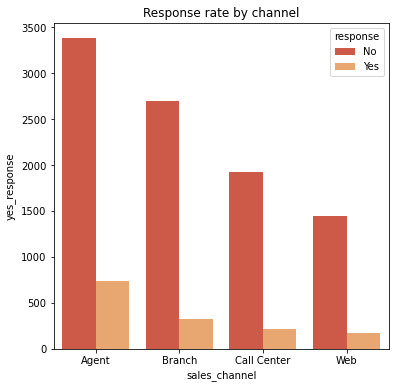

In [42]:
sns.set_palette("RdYlGn")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate["sales_channel"],y=response_rate["yes_response"],hue=response_rate["response"])
ax.set_title("Response rate by channel")



In [43]:
#Show a plot of the response rate by the total claim amount.
#I create buckets in the variable total_claim_amount
pd.cut(ca_df['total_claim_amount'],4)

0          (-2.794, 723.384]
1        (723.384, 1446.669]
2          (-2.794, 723.384]
3          (-2.794, 723.384]
4          (-2.794, 723.384]
                ...         
10905    (723.384, 1446.669]
10906      (-2.794, 723.384]
10907      (-2.794, 723.384]
10908      (-2.794, 723.384]
10909    (723.384, 1446.669]
Name: total_claim_amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-2.794, 723.384] < (723.384, 1446.669] < (1446.669, 2169.955] < (2169.955, 2893.24]]

In [44]:
#I create the label for the new column total_claim_amount_binned
total_claim_amount_labels = ['Low', 'Moderate', 'High', 'Very High']
ca_df['total_claim_amount_binned'] = pd.cut(ca_df['total_claim_amount'],4, labels=total_claim_amount_labels)

In [45]:
response_rate_c=ca_df.groupby(['response',"total_claim_amount_binned"])['yes_response'].count().reset_index()
response_rate_c

,response,total_claim_amount_binned,yes_response
0,No,Low,8239
1,No,Moderate,1107
2,No,High,86
3,No,Very High,12
4,Yes,Low,1341
5,Yes,Moderate,125
6,Yes,High,0
7,Yes,Very High,0


Text(0.5, 1.0, 'Response rate by the total claim amount')

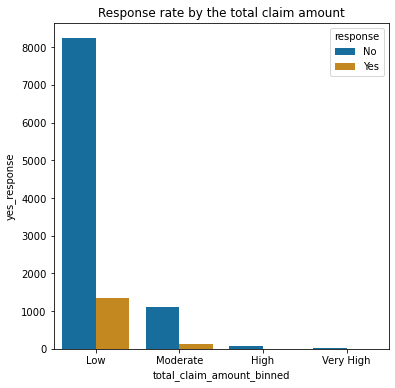

In [46]:
sns.set_palette("colorblind")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_c["total_claim_amount_binned"],y=response_rate_c["yes_response"],hue=response_rate_c["response"])
ax.set_title("Response rate by the total claim amount")


In [47]:
#Show a plot of the response rate by income.
#I create buckets for the column income
pd.cut(ca_df['income'],4)

0        (24995.25, 49990.5]
1        (-99.981, 24995.25]
2        (-99.981, 24995.25]
3        (24995.25, 49990.5]
4        (-99.981, 24995.25]
                ...         
10905    (-99.981, 24995.25]
10906    (49990.5, 74985.75]
10907    (24995.25, 49990.5]
10908    (49990.5, 74985.75]
10909    (-99.981, 24995.25]
Name: income, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-99.981, 24995.25] < (24995.25, 49990.5] < (49990.5, 74985.75] < (74985.75, 99981.0]]

In [48]:
income_labels = ['Low', 'Lower_middel', 'Upper_middle', 'Hight']
ca_df['income_binned'] = pd.cut(ca_df['income'],4, labels=income_labels)

In [49]:
response_rate_i=ca_df.groupby(['response',"income_binned"])['yes_response'].count().reset_index()
response_rate_i

,response,income_binned,yes_response
0,No,Low,3680
1,No,Lower_middel,2374
2,No,Upper_middle,1985
3,No,Hight,1405
4,Yes,Low,558
5,Yes,Lower_middel,390
6,Yes,Upper_middle,335
7,Yes,Hight,183


Text(0.5, 1.0, 'Response rate by income')

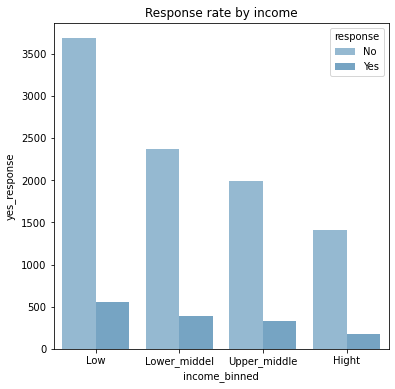

In [50]:
sns.set_palette("Blues_d")
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=response_rate_i["income_binned"],y=response_rate_i["yes_response"],hue=response_rate_i["response"])
ax.set_title("Response rate by income")

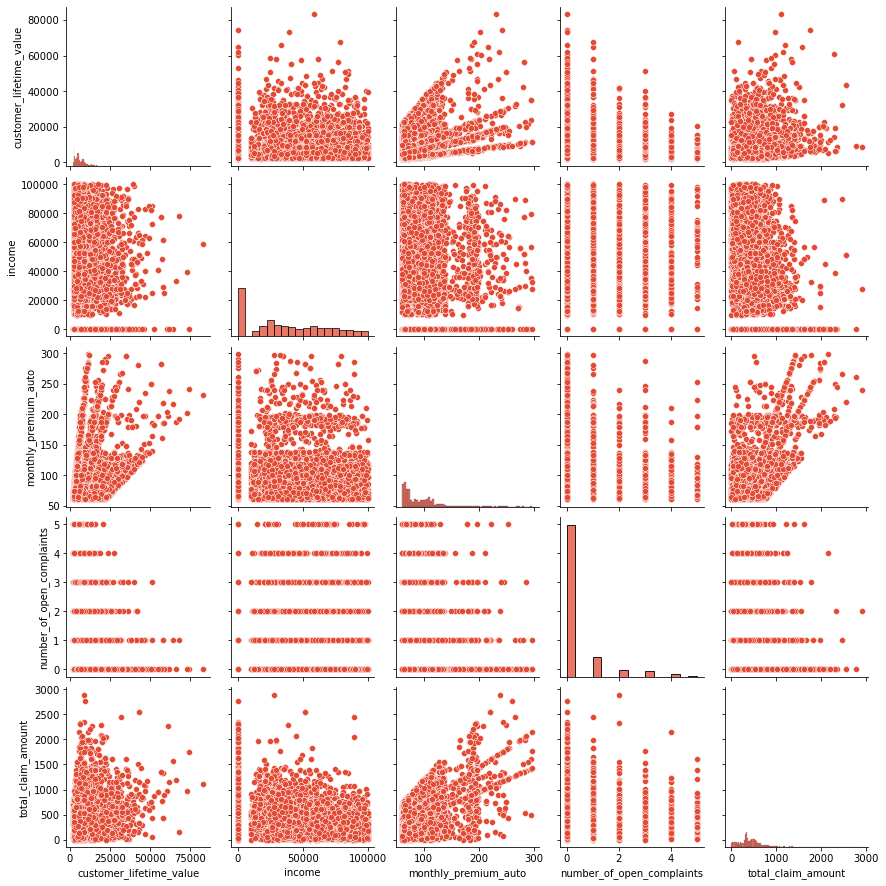

In [52]:
#I want to see the relation between the variables.

sns.pairplot(ca_df)

In [51]:
# Plot the Correlation Heatmap
#before, we can check the correlation

ca_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,-0.030616,0.232626
income,0.028306,1.000000,-0.009788,0.008425,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,-0.010059,0.631799
number_of_open_complaints,-0.030616,0.008425,-0.010059,1.000000,-0.012380
total_claim_amount,0.232626,-0.354141,0.631799,-0.012380,1.000000


<AxesSubplot:>

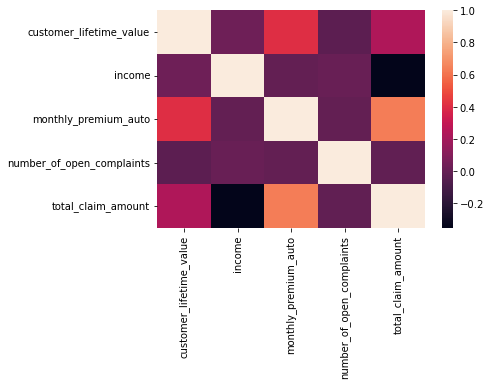

In [55]:
sns.heatmap(ca_df.corr())

In [53]:

ca_df.corr().to_csv("correllation.csv")

## Numerical /Categorical variables

In [57]:
#I will get the numerical columns from ca_df.
#with this columns I will create a new dataframe called numerical_df

list(ca_df._get_numeric_data())

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'total_claim_amount']

In [58]:
numerical_df = ca_df[[
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'number_of_open_complaints',
 'total_claim_amount']]

numerical_df


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,4809.216960,48029,61,0,292.800000
1,2228.525238,0,64,0,744.924331
2,14947.917300,22139,100,0,480.000000
3,22332.439460,49078,97,0,484.013411
4,9025.067525,23675,117,0,707.925645
...,...,...,...,...,...
10905,15563.369440,0,253,0,1214.400000
10906,5259.444853,61146,65,0,273.018929
10907,23893.304100,39837,201,0,381.306996
10908,11971.977650,64195,158,4,618.288849


In [59]:
#I do the same for categorical dataframe


In [60]:
list(ca_df.select_dtypes('object'))

['state',
 'education',
 'gender',
 'policy_type',
 'vehicle_class',
 'sales_channel',
 'response',
 'region',
 'yes_response']

In [61]:
categorical_df = ca_df[[
 'state',
 'education',
 'gender',
 'policy_type',
 'vehicle_class',
 'sales_channel',
 'response',
 'region',
 'yes_response']]

categorical_df

,state,education,gender,policy_type,vehicle_class,sales_channel,response,region,yes_response
0,arizona,College,M,Corporate Auto,Four-Door Car,Agent,No,central,0
1,california,College,F,Personal Auto,Four-Door Car,Call Center,No,west,0
2,washington,Bachelor,M,Personal Auto,SUV,Call Center,No,east,0
3,oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes,north,1
4,oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No,north,0
...,...,...,...,...,...,...,...,...,...
10905,nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No,central,0
10906,oregon,College,F,Personal Auto,Four-Door Car,Branch,No,north,0
10907,arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No,central,0
10908,california,College,F,Personal Auto,SUV,Branch,No,west,0


## Normality of the numerical variables

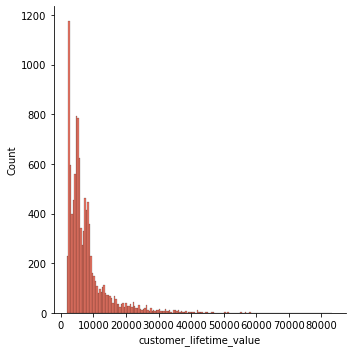

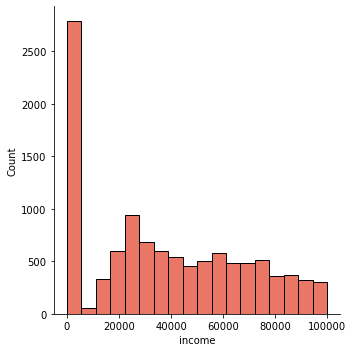

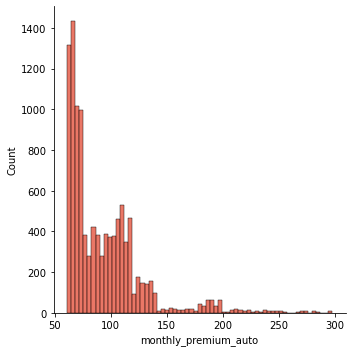

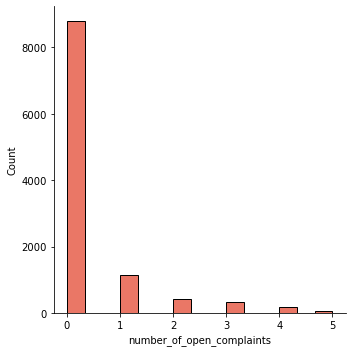

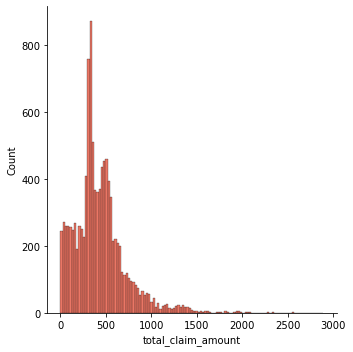

In [62]:
# we will use sns library to make distribution plots

fig.suptitle('Distribution plots')
sns.displot(numerical_df, x="customer_lifetime_value")
sns.displot(numerical_df, x='income')
sns.displot(numerical_df, x="monthly_premium_auto")
sns.displot(numerical_df, x='number_of_open_complaints')
sns.displot(numerical_df, x='total_claim_amount')


Text(0.5, 1.0, 'total_claim_amount histogram')

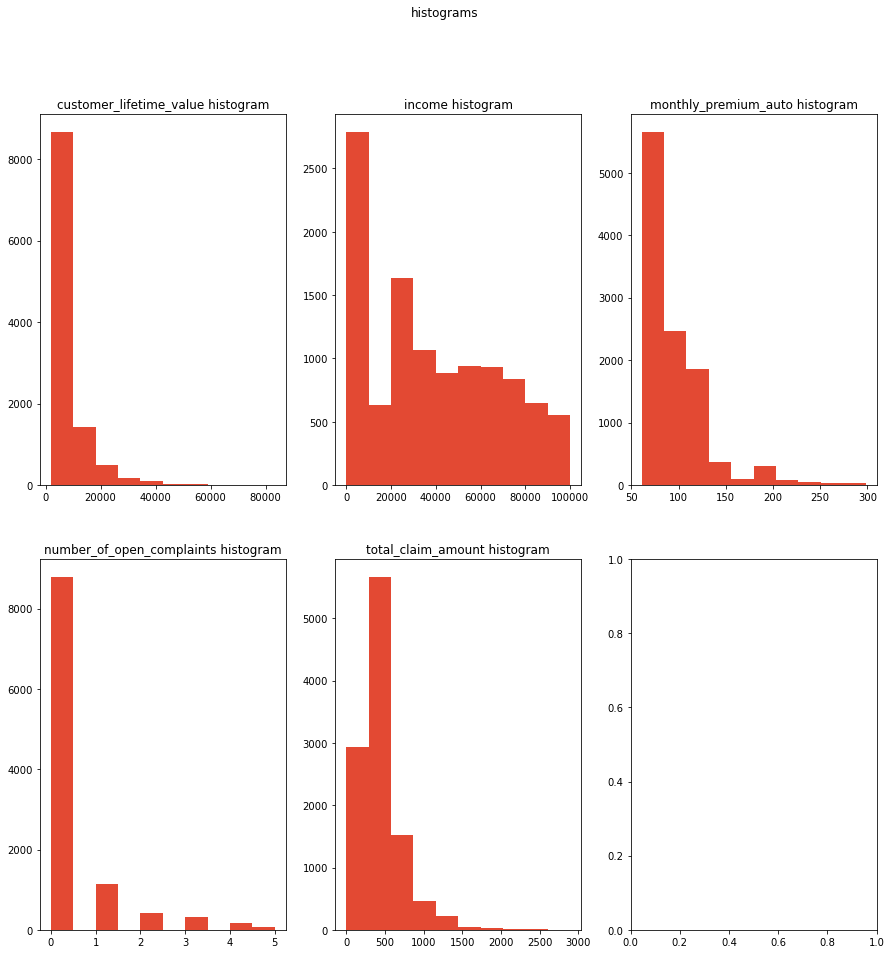

In [63]:
#use matplotlib to make histograms

fig,ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle('histograms')
ax[0,0].hist(ca_df["customer_lifetime_value"])
ax[0,0].set_title("customer_lifetime_value histogram")

ax[0,1].hist(ca_df['income'])
ax[0,1].set_title('income histogram')

ax[0,2].hist(ca_df["monthly_premium_auto"])
ax[0,2].set_title("monthly_premium_auto histogram")

ax[1,0].hist(ca_df['number_of_open_complaints'])
ax[1,0].set_title('number_of_open_complaints histogram')

ax[1,1].hist(ca_df['total_claim_amount'])
ax[1,1].set_title('total_claim_amount histogram')
    



The distribution of some numerical variables look like a normal distribution. For example:"customer lifetime value", "monthly premium auto", and "total claim amount"

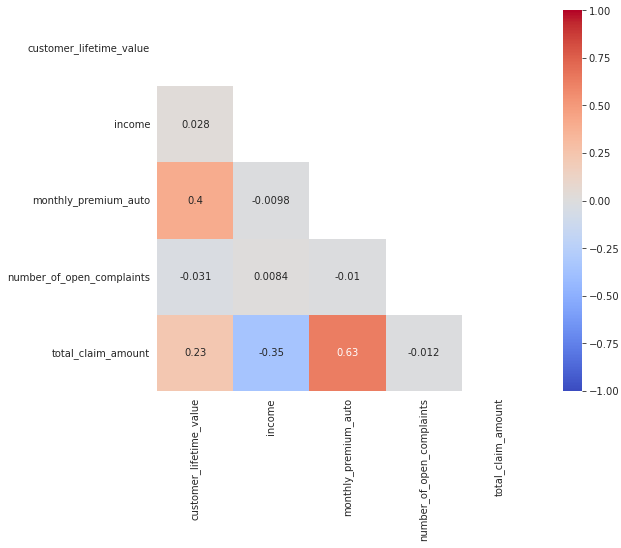

In [68]:
# we use the correlation matrix to check the multicollinearity

corr = numerical_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

As we do not have values >0.80. I do not delete any column from numerical_df dataframe